In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [2]:
df=pd.read_csv('_All_Cities_Cleaned.csv')
data=df[df["city"]=="Chennai"]

In [3]:
len(data)

8658

# EDA of the data set

In [4]:
print(data.shape)
data.info()
data.columns

(8658, 10)
<class 'pandas.core.frame.DataFrame'>
Index: 8658 entries, 41525 to 50182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    8658 non-null   object
 1   bedroom        8658 non-null   int64 
 2   layout_type    8658 non-null   object
 3   property_type  8658 non-null   object
 4   locality       8658 non-null   object
 5   price          8658 non-null   int64 
 6   area           8658 non-null   int64 
 7   furnish_type   8658 non-null   object
 8   bathroom       8658 non-null   int64 
 9   city           8658 non-null   object
dtypes: int64(4), object(6)
memory usage: 744.0+ KB


Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city'],
      dtype='object')

In [5]:
data.describe()

,bedroom,price,area,bathroom
count,8658.000000,8658.000000,8658.000000,8658.000000
mean,2.144260,25014.253523,1210.770732,2.059945
std,0.893989,38230.273420,868.078779,0.896639
min,1.000000,2000.000000,150.000000,1.000000
25%,2.000000,10000.000000,750.000000,1.000000
50%,2.000000,15000.000000,1000.000000,2.000000
75%,3.000000,25000.000000,1350.000000,2.000000
max,10.000000,600000.000000,12000.000000,10.000000


Check for null values

In [6]:
#Check for missing values
print(data.isnull().sum())

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
city             0
dtype: int64


check normality

C:\Users\mario\AppData\Local\Temp\ipykernel_16812\4032185857.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


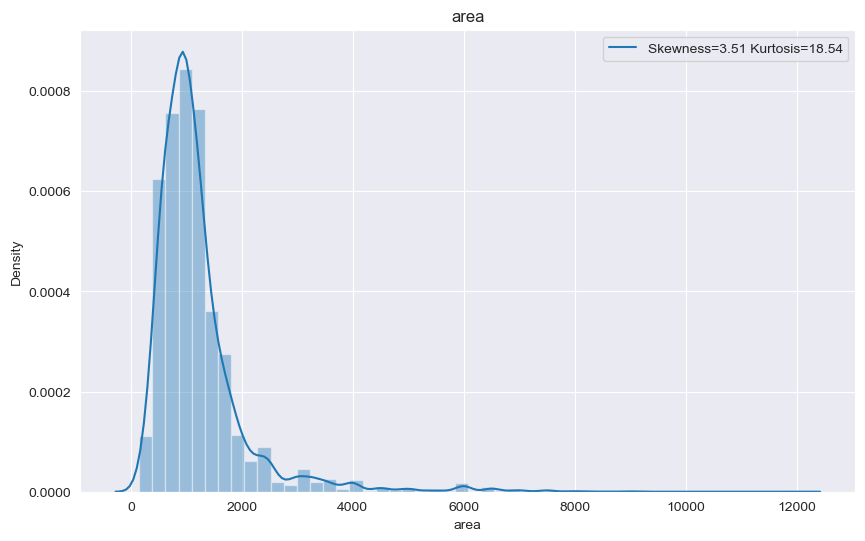

C:\Users\mario\AppData\Local\Temp\ipykernel_16812\4032185857.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


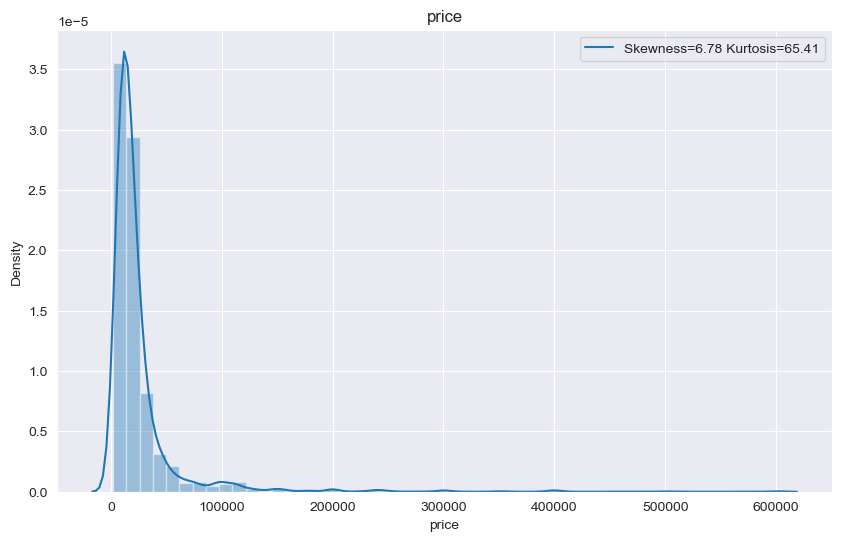

In [7]:
#checking for normality
def analyse_continuous(df, var):
    df = df.copy()  
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(df[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            data[var].skew(), 
            data[var].kurt())
        ],
        loc='best')
    plt.title(var)
    plt.show()

list=["area","price"]
for var in list:
    analyse_continuous(data, var)
#here it does not follow normal distribution

we observe from the above plot data is not normally distributed and hence apply log transformation

C:\Users\mario\AppData\Local\Temp\ipykernel_16812\1860035293.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


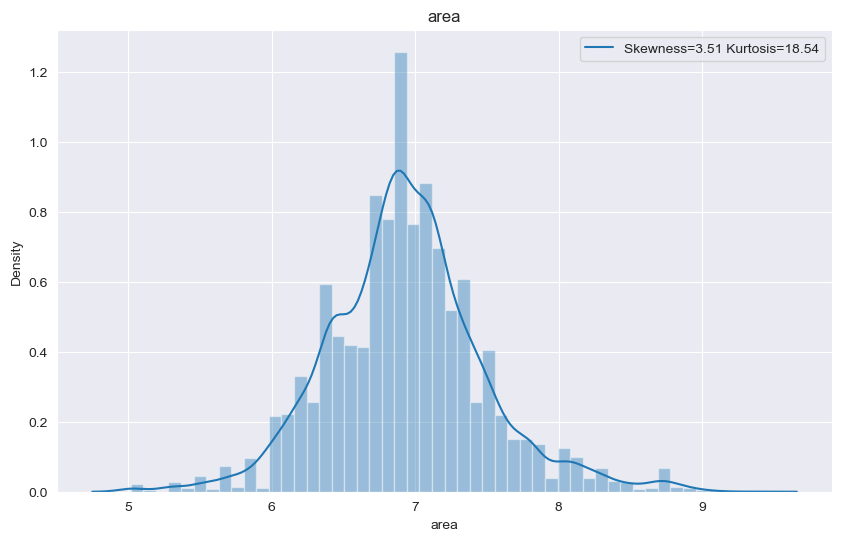

C:\Users\mario\AppData\Local\Temp\ipykernel_16812\1860035293.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[var], hist=True)


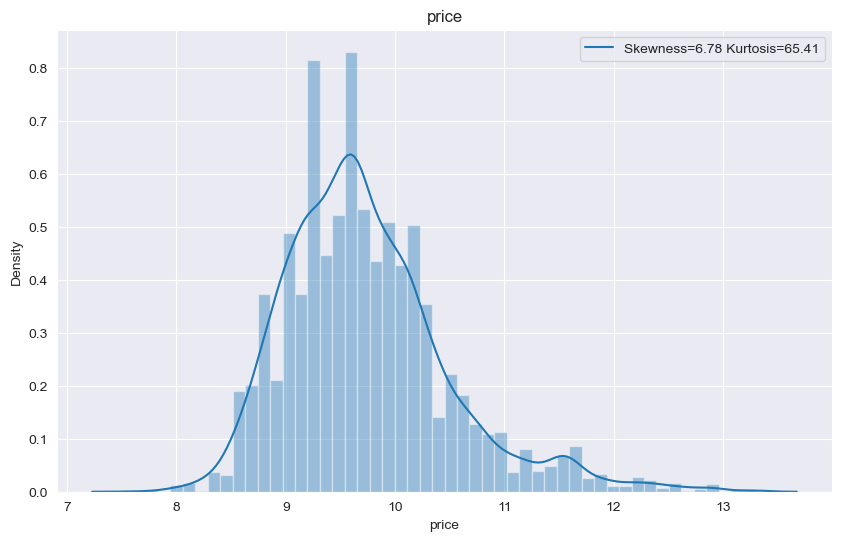

In [8]:
#apply logarithmic transformation and check for normality Note:log is applied on copy of data not on data itself
def analyse_transformed_continuous(df, var):
    df = df.copy()
    df[var] = np.log1p(df[var])
    plt.figure(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.distplot(df[var], hist=True)
    plt.legend(['Skewness={:.2f} Kurtosis={:.2f}'.format(
            data[var].skew(), 
            data[var].kurt())
        ],
        loc='best')
    plt.title(var)
    plt.show()
for var in list:
    analyse_transformed_continuous(data, var)

## outliers

c:\Users\mario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


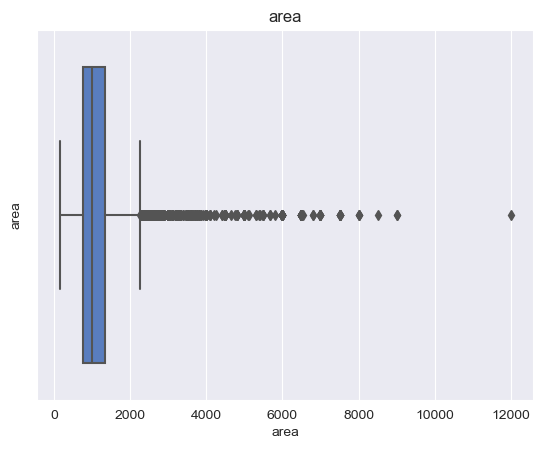

c:\Users\mario\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


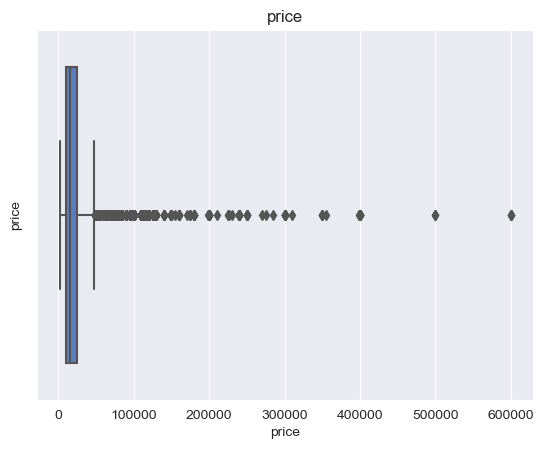

In [9]:
#for price and area
def find_outliers(df, var):
    df = df.copy()
    df[var] = np.log1p(df[var])
    ax = sns.boxplot(x=data[var], palette="muted", orient="vertical")
    plt.title(var)
    plt.ylabel(var)
    plt.show()
for var in list:
    find_outliers(data, var)

IQR 


In [10]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Standard deviation 

In [11]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Now we find the number of outliers for price,area,bathrooms and bedrooms using IQR and STD

For price

In [12]:
print("IQR:")
out_iqr(data, 'price')
print("\n")
print("STD:")
out_std(data,'price')

IQR:
The IQR is 15000.0
The lower bound value is -12500.0
The upper bound value is 47500.0
Total number of outliers are 769


STD:
The lower bound value is -89676.56673626439
The upper bound value is 139705.07378177144
Total number of outliers are 155


for area

In [13]:
print("IQR:")
out_iqr(data, 'area')
print("\n")
print("STD:")
out_std(data,'area')

IQR:
The IQR is 600.0
The lower bound value is -150.0
The upper bound value is 2250.0
Total number of outliers are 634


STD:
The lower bound value is -1393.465604705132
The upper bound value is 3815.007069246596
Total number of outliers are 187


for bedroom

In [14]:
print("IQR:")
out_iqr(data, 'bedroom')
print("\n")
print("STD:")
out_std(data,'bedroom')

IQR:
The IQR is 1.0
The lower bound value is 0.5
The upper bound value is 4.5
Total number of outliers are 99


STD:
The lower bound value is -0.5377081149496288
The upper bound value is 4.826227403468917
Total number of outliers are 99


for bathroom

In [15]:
print("IQR:")
out_iqr(data, 'bathroom')
print("\n")
print("STD:")
out_std(data,'bathroom')

IQR:
The IQR is 1.0
The lower bound value is -0.5
The upper bound value is 3.5
Total number of outliers are 444


STD:
The lower bound value is -0.6299712998642777
The upper bound value is 4.749860419753397
Total number of outliers are 122


## Categorical Variables analysis

In [16]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if data[var].dtypes == 'O']

print('Number of categorical variables: ', len(cat_vars))
print(cat_vars)

Number of categorical variables:  6
['seller_type', 'layout_type', 'property_type', 'locality', 'furnish_type', 'city']


In [17]:
data[cat_vars].head()

,seller_type,layout_type,property_type,locality,furnish_type,city
41525,OWNER,BHK,Apartment,Ambattur,Semi-Furnished,Chennai
41526,OWNER,BHK,Apartment,Kelambakkam,Semi-Furnished,Chennai
41527,OWNER,BHK,Apartment,Adyar,Semi-Furnished,Chennai
41528,OWNER,BHK,Apartment,Sembakkam,Unfurnished,Chennai
41529,OWNER,BHK,Independent House,Mogappair,Unfurnished,Chennai


categories of in each categorical variables

In [18]:
data[cat_vars].nunique().sort_values(ascending=False)

locality         398
property_type      6
seller_type        3
furnish_type       3
layout_type        2
city               1
dtype: int64

cardinality of these variables

In [19]:
data[cat_vars].nunique() / len(data)


seller_type      0.000347
layout_type      0.000231
property_type    0.000693
locality         0.045969
furnish_type     0.000347
city             0.000116
dtype: float64

In [20]:
# we remove city from the list as the city column only contains chennai and of not much use
cat_vars.remove('city')

now we see for rare labels present in these categorical values


In [22]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['price'].count() /len(data)
   

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print("\n")

seller_type
BUILDER    0.005082
Name: price, dtype: float64


Series([], Name: price, dtype: float64)


property_type
Penthouse    0.000116
Name: price, dtype: float64


locality
200 Feet Road                       0.000116
Abiramapuram                        0.000578
Adambakkam                          0.000462
Adambakkam NGO Colony               0.000116
Adhanur                             0.000231
                                      ...   
ennore                              0.000462
kanakpura                           0.000231
mELAKOTTAIYUR                       0.000116
mylapore                            0.000116
old pallavaram jeya lakhsminagar    0.000116
Name: price, Length: 373, dtype: float64


Series([], Name: price, dtype: float64)




The above labels are present for less than 1% in the categories

now we check for the frequent labels in the categories and  make them into a dictionary

In [23]:
def find_frequent_labels(df, var, rare_perc):
    # function finds the labels that are shared by more than
    # a certain % of the houses in the dataset
    df = df.copy()
    tmp = df.groupby(var)['price'].count() / len(df)
    return tmp[tmp > rare_perc].index.values

frequent_ls = {}
for var in cat_vars:
    frequent_ls[var] = find_frequent_labels(data, var, 0.01)
    
frequent_ls

{'seller_type': array(['AGENT', 'OWNER'], dtype=object),
 'layout_type': array(['BHK', 'RK'], dtype=object),
 'property_type': array(['Apartment', 'Independent Floor', 'Independent House',
        'Studio Apartment', 'Villa'], dtype=object),
 'locality': array(['Adambakam', 'Adyar', 'Ambattur', 'Choolaimedu', 'Chromepet',
        'Kodambakkam', 'Kolathur', 'Kottivakkam', 'Madipakkam',
        'Medavakkam', 'Neelankarai', 'Nungambakkam', 'Pallikaranai',
        'Perumbakkam', 'Perungalathur', 'Perungudi', 'Porur',
        'Sholinganallur', 'T Nagar', 'Thiruvanmiyur', 'Thoraipakkam OMR',
        'Vadapalani', 'Velachery', 'West Mambalam', 'tambaram west'],
       dtype=object),
 'furnish_type': array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)}

now we plot property type to see what type is available the most


In [24]:
grdsp = data.groupby(["property_type"])[["price"]].mean().reset_index()

fig = px.pie(grdsp,
             values="price",
             names="property_type",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

# Feature Engineering

In [25]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8658 entries, 41525 to 50182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    8658 non-null   object
 1   bedroom        8658 non-null   int64 
 2   layout_type    8658 non-null   object
 3   property_type  8658 non-null   object
 4   locality       8658 non-null   object
 5   price          8658 non-null   int64 
 6   area           8658 non-null   int64 
 7   furnish_type   8658 non-null   object
 8   bathroom       8658 non-null   int64 
 9   city           8658 non-null   object
dtypes: int64(4), object(6)
memory usage: 744.0+ KB


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
41525,OWNER,3,BHK,Apartment,Ambattur,17000,1570,Semi-Furnished,2,Chennai
41526,OWNER,2,BHK,Apartment,Kelambakkam,16000,1402,Semi-Furnished,2,Chennai
41527,OWNER,2,BHK,Apartment,Adyar,20000,800,Semi-Furnished,2,Chennai
41528,OWNER,2,BHK,Apartment,Sembakkam,14000,1180,Unfurnished,2,Chennai
41529,OWNER,1,BHK,Independent House,Mogappair,7000,400,Unfurnished,1,Chennai


Change datatype of bedroom and bathrooms to int 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8658 entries, 41525 to 50182
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    8658 non-null   object
 1   bedroom        8658 non-null   int64 
 2   layout_type    8658 non-null   object
 3   property_type  8658 non-null   object
 4   locality       8658 non-null   object
 5   price          8658 non-null   int64 
 6   area           8658 non-null   int64 
 7   furnish_type   8658 non-null   object
 8   bathroom       8658 non-null   int64 
 9   city           8658 non-null   object
dtypes: int64(4), object(6)
memory usage: 744.0+ KB


Now we remove outliers using the IQR upper bound found for area,price,bedrooms and bathooms

In [28]:
price_upper, price_lower = 47500, 1
area_upper, area_lower = 2250, 1
bed_upper, bed_lower = 4, 1
bathroom_upper, bathroom_lower = 3, 1
data = data[(data['price'] <= price_upper) & (data['price'] >= price_lower)]
data = data[(data['area'] <= area_upper) & (data['area'] >= area_lower)]
data = data[(data['bedroom'] <= bed_upper) & (data['bedroom'] >= bed_lower)]
data = data[(data['bathroom'] <= bathroom_upper) & (data['bathroom'] >= bathroom_lower)]

In [29]:
data.shape

(7691, 10)

transformation of price and area

In [30]:
for var in ['price','area']:
    data[var] = np.log(data[var])   

categorical variables

removing rare variables

In [31]:
for var in cat_vars:
    data[var] = np.where(data[var].isin(
        frequent_ls[var]), data[var], 'Rare')

In [32]:
data.head(100)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
41525,OWNER,3,BHK,Apartment,Ambattur,9.740969,7.358831,Semi-Furnished,2,Chennai
41526,OWNER,2,BHK,Apartment,Rare,9.680344,7.245655,Semi-Furnished,2,Chennai
41527,OWNER,2,BHK,Apartment,Adyar,9.903488,6.684612,Semi-Furnished,2,Chennai
41528,OWNER,2,BHK,Apartment,Rare,9.546813,7.073270,Unfurnished,2,Chennai
41529,OWNER,1,BHK,Independent House,Rare,8.853665,5.991465,Unfurnished,1,Chennai
...,...,...,...,...,...,...,...,...,...,...
41630,OWNER,2,BHK,Apartment,Perumbakkam,10.126631,6.907755,Furnished,2,Chennai
41631,OWNER,2,BHK,Apartment,Perumbakkam,10.126631,6.907755,Furnished,2,Chennai
41632,OWNER,3,BHK,Independent House,Rare,9.433484,7.313220,Semi-Furnished,3,Chennai
41633,OWNER,3,BHK,Independent House,Rare,9.433484,7.313220,Semi-Furnished,3,Chennai


Encoding of categorical variables

In [33]:
# this function will assign discrete values to the strings of the variables,
# so that the smaller value corresponds to the category that shows the smaller
# mean house sale price
def replace_categories(data, var, target):

    # order the categories in a variable from that with the lowest
    # house sale price, to that with the highest
    ordered_labels = data.groupby([var])[target].mean().sort_values().index
    print(ordered_labels)

    # create a dictionary of ordered categories to integer values
    ordinal_label = {k: i for i, k in enumerate(ordered_labels, 0)}
    print(ordinal_label)

    # use the dictionary to replace the categorical strings by integers
    data[var] = data[var].map(ordinal_label)


for var in cat_vars:
    replace_categories(data, var, 'price')


Index(['OWNER', 'AGENT', 'Rare'], dtype='object', name='seller_type')
{'OWNER': 0, 'AGENT': 1, 'Rare': 2}
Index(['RK', 'BHK'], dtype='object', name='layout_type')
{'RK': 0, 'BHK': 1}
Index(['Studio Apartment', 'Independent House', 'Independent Floor', 'Villa',
       'Apartment'],
      dtype='object', name='property_type')
{'Studio Apartment': 0, 'Independent House': 1, 'Independent Floor': 2, 'Villa': 3, 'Apartment': 4}
Index(['Perungalathur', 'Chromepet', 'tambaram west', 'Ambattur',
       'Pallikaranai', 'Kolathur', 'Medavakkam', 'Madipakkam', 'Rare',
       'Perumbakkam', 'Choolaimedu', 'Perungudi', 'Adambakam', 'Velachery',
       'Porur', 'Kottivakkam', 'Sholinganallur', 'Kodambakkam',
       'West Mambalam', 'Thoraipakkam OMR', 'Neelankarai', 'Vadapalani',
       'Nungambakkam', 'Thiruvanmiyur', 'T Nagar', 'Adyar'],
      dtype='object', name='locality')
{'Perungalathur': 0, 'Chromepet': 1, 'tambaram west': 2, 'Ambattur': 3, 'Pallikaranai': 4, 'Kolathur': 5, 'Medavakkam': 6, '

In [34]:
data.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
41525,0,3,1,4,3,9.740969,7.358831,1,2,Chennai
41526,0,2,1,4,8,9.680344,7.245655,1,2,Chennai
41527,0,2,1,4,25,9.903488,6.684612,1,2,Chennai
41528,0,2,1,4,8,9.546813,7.073270,0,2,Chennai
41529,0,1,1,1,8,8.853665,5.991465,0,1,Chennai


In [35]:

features=["seller_type","bedroom","layout_type","property_type","locality","price","area","furnish_type","bathroom"]
data_final = data[features].copy()
data_final.head()
for feature in features:
    data_final[feature] = data_final[feature].astype(np.float64)

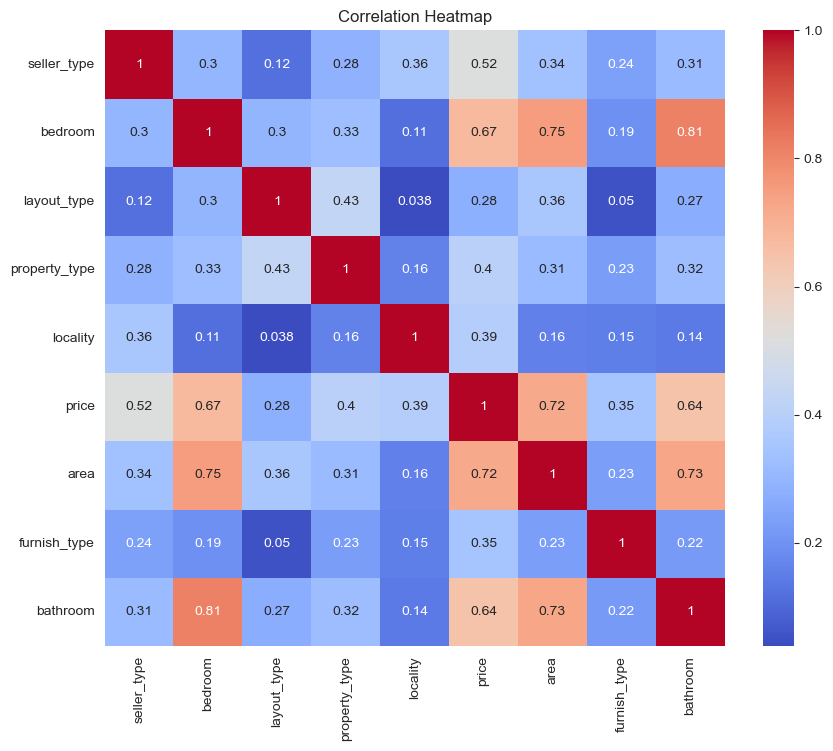

In [36]:
correlation_matrix = data_final.corr()



plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [37]:
data_final.to_csv('data_cleaned.csv', index=False)